In [10]:
import xml.etree.ElementTree
import pandas as pd
import os, sys
import pickle

MNET_PATH = '/Users/anamaria/git/molnet/code/'
sys.path.append(MNET_PATH)

In [2]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/'

osp = MAC

## Create metabolites dictionary

Parse metabolites list downloaded from HMDB in xml format

In [4]:
path_to_hmdbfile = osp+ 'Metabolomics_datasets/serum_metabolites.xml'
et = xml.etree.ElementTree.parse(path_to_hmdbfile)
root = et.getroot()


KeyboardInterrupt: 

In [4]:
metabolites = {}
stringtag = '{http://www.hmdb.ca}'
for metabolite in root.findall(stringtag+'metabolite'):
    accid = metabolite.find(stringtag+'accession').text
    name = metabolite.find(stringtag+'name').text
    mass = metabolite.find(stringtag+'average_molecular_weight').text
    chemform = metabolite.find(stringtag+'chemical_formula').text
    
    metabolites[accid] = (mass, chemform, name)  
    
with open(os.path.join(osp,'Metabolomics_datasets/metabolites.dict'), 'wb') as handle:
    pickle.dump(metabolites, handle)  

In [4]:
with open(os.path.join(osp,'Metabolomics_datasets/metabolites.dict'), 'rb') as file:
    metabolites = pickle.load(file)

## Load annotated data

In [5]:
annotated_data = pd.read_csv(osp+'pymz/mzmine/221119/annotated_data.csv', sep = ',', index_col = 0)

In [7]:
annotated_data = pd.read_csv('/Users/anamaria/Desktop/mzmine/221119/hat_annotated_data.csv', sep = ',', index_col = 0)

In [8]:
annotated_data

,row m/z,row retention time,adj-p,t-val,custom_id.1,compound_names,compound_id,pathway,standards_match
custom_id,,,,,,,,,
7219,481.232518,7.884399,4.577734e-86,232.540494,7219,NaN,row1,NaN,NaN
3013,302.196068,10.477401,9.116643e-14,-11.712335,3013,NaN,row2,NaN,NaN
2092,202.180209,11.976537,1.553678e-13,-11.450319,2092,NaN,row3,NaN,NaN
2233,216.195819,10.855802,2.904047e-13,-11.197623,2233,NaN,row4,NaN,NaN
2106,203.183588,11.974607,4.188228e-13,-11.028958,2106,NaN,row5,NaN,NaN
2254,217.199121,10.851871,4.188228e-13,-10.947863,2254,NaN,row6,NaN,NaN
3086,317.215185,9.938294,4.188228e-13,-10.943577,3086,NaN,row7,NaN,NaN
3080,316.211756,9.939838,6.219595e-13,-10.799357,3080,NaN,row8,NaN,NaN
3136,330.227323,9.587620,9.209904e-13,-10.660827,3136,NaN,row9,NaN,NaN


## Filter out data with no spectra

In [21]:
with open(os.path.join(osp,'pymz/mzmine/aligner_gp.txt'), 'rb') as file:
    aligner_gp = pickle.load(file)   

In [12]:
#hat data
with open(os.path.join('/Users/anamaria/Desktop/mzmine/221119/aligner_hat.txt'), 'rb') as file:
    aligner_gp = pickle.load(file)  

In [14]:
peaksets = []
annotated_data['spectra'] = ['nan']*len(annotated_data)
for peakid in annotated_data['custom_id.1']:
    new_peakid = peakid - 1
    np = aligner_gp.peaksets[new_peakid].n_peaks
    spectra = {}
    if np > 1:
        for i in range(np-1):
            source = aligner_gp.peaksets[new_peakid].peaks[i+1].source_file
            msms = aligner_gp.peaksets[new_peakid].peaks[i+1].ms2_spectrum
            spectra[source] = msms
        annotated_data.at[peakid,'spectra'] = spectra


## Add possible adducts for each peak and their respective HMDB accession id

In [21]:
def compute_adducts(mz, positive = True):
    
    PROTON = 1.00727646677
    if positive:
        addList = [(mz - PROTON, 'M+H[1+]', ''),
             ((mz - PROTON)*2, 'M+2H[2+]', ''),
             ((mz - PROTON)*3, 'M+3H[3+]', ''),
             (mz - 1.0034 - PROTON, 'M(C13)+H[1+]', 'C'),
             ((mz - 0.5017 - PROTON)*2, 'M(C13)+2H[2+]', 'C'),
             ((mz - 0.3344 - PROTON)*3, 'M(C13)+3H[3+]', 'C'),
             (mz -1.9958 - PROTON, 'M(S34)+H[1+]', 'S'),
             (mz -1.9972 - PROTON, 'M(Cl37)+H[1+]', 'Cl'),
             (mz - 21.9820 - PROTON, 'M+Na[1+]', ''), 
             ((mz - 10.991 - PROTON)*2, 'M+H+Na[2+]', ''),
             (mz - 37.9555 - PROTON, 'M+K[1+]', ''), 
             (mz - 18.0106 - PROTON, 'M+H2O+H[1+]', ''), 
             (mz + 18.0106 - PROTON, 'M-H2O+H[1+]', 'H2O'), 
             (mz + 36.0212 - PROTON, 'M-H4O2+H[1+]', 'H4O2'),
             (mz + 17.0265 - PROTON, 'M-NH3+H[1+]', 'NH3'),
             (mz + 27.9950 - PROTON, 'M-CO+H[1+]', 'CO'),
             (mz + 43.9898 - PROTON, 'M-CO2+H[1+]', 'CO2'),
             (mz + 46.0054 - PROTON, 'M-HCOOH+H[1+]', 'H2CO2'),
             (mz - 67.9874 - PROTON, 'M+HCOONa[1+]', ''),
             (mz + 67.9874 - PROTON, 'M-HCOONa+H[1+]', 'HCO2Na'),
             (mz - 57.9586 - PROTON, 'M+NaCl[1+]', ''), 
             (mz + 72.0211 - PROTON, 'M-C3H4O2+H[1+]', 'C3H4O2'),
             (mz - 83.9613 - PROTON, 'M+HCOOK[1+]', ''),
             (mz + 83.9613 - PROTON, 'M-HCOOK+H[1+]', 'HCO2K'),
             ] 

    return addList

In [22]:
def annotate_adduct(adducts, metabolites, tolerance = 0.01):
    ids = []
    names = []
    for adduct in adducts:
        mw = adduct[0]
        for key in metabolites:
            if metabolites[key][0] != None:
                if mw > float(metabolites[key][0]) - tolerance and mw < float(metabolites[key][0]) + tolerance:
                    ids.append(key)
                    names.append(metabolites[key][2])
    return ids, names
        

In [42]:
annotated_data['adducts'] = ['nan']*len(annotated_data)
for i,row in annotated_data.iterrows():
    mz = row['row m/z']
    annotated_data.at[i, 'adducts'] = compute_adducts(mz)

In [43]:
annotated_data['hmdbacc']=['nan']*len(annotated_data)
annotated_data['hmdbname']=['nan']*len(annotated_data)
for i,row in annotated_data.iterrows():
    adducts = row['adducts']
    
    
    ids, names = annotate_adduct(adducts, metabolites, 0.3)
    
    annotated_data.at[i, 'hmdbacc'] = ids
    annotated_data.at[i, 'hmdbname'] = names
        

In [45]:
annotated_data.loc[2233]['hmdbname']

['Propenoylcarnitine',
 'Fencamfamine',
 'Diethylcarbamazine N-oxide',
 'Ketoprofen glucuronide',
 'Trandolapril',
 'Bicalutamide',
 'Budesonide',
 "Daidzein 4'-O-glucuronide",
 'Daidzein 7-O-glucuronide',
 'Acarbose',
 'Amiodarone',
 'Cefoperazone',
 'Methyl bisnorbiotinyl ketone',
 'Carmustine',
 'Sulfacetamide',
 'Amifostine',
 'Chloroxine',
 'fluorobenzoylpropionic acid',
 '1-hydroxytacrine',
 'Sulfamethoxazole N1-glucuronide',
 'Oxiconazole',
 'Mifepristone',
 'Abiraterone sulfate',
 'Indoxyl sulfate',
 'Guanadrel Sulfate',
 'Phenazopyridine',
 'Droxidopa',
 'Indoxyl sulfate',
 'Guanadrel Sulfate',
 'Phenazopyridine',
 'Droxidopa',
 '2-Methylhippuric acid',
 '3-Carbamoyl-2-phenylpropionaldehyde',
 '4-Hydroxy-5-phenyltetrahydro-1,3-oxazin-2-one',
 '4-Anilino-4-oxobutanoic acid',
 '1b,3a,12a-Trihydroxy-5b-cholanoic acid',
 'Cholic acid',
 'Ursocholic acid',
 'Tamsulosin',
 'Melatonin glucuronide',
 '6-beta-hydroxydexamethasone',
 'N-Methylnicotinium',
 '5-Hydroxytryptophol',
 'Sulfo

## Get ms2 data from HMDB ms2 xml files

In [25]:
def get_ms2_spec_from_hmdb(file, parent_mz):
    import mnet
    path_to_hmdbfile = file
    et = xml.etree.ElementTree.parse(path_to_hmdbfile)
    element = et.getroot()
    mode = element.find('ionization-mode').text
    if mode == 'positive':
        instrtype = element.find('instrument-type').text
        filename = element.find('database-id').text
        np = element.find('peak-counter').text
        peaks = []
        
        for msms in element.find('ms-ms-peaks'):
            mz = float(msms.find('mass-charge').text)
            intensity = float(msms.find('intensity').text)
            
            peaks.append((mz, intensity))
            
        
        ms2_spectrum = mnet.Spectrum(peaks, filename, None, None, parent_mz, parent_mz, metadata = (instrtype, mode))
        return ms2_spectrum
    

In [26]:
def return_best_match_metabolite(ms2specdata, hmdbacclist):
    import glob
    from scoring_functions import fast_cosine
   
    best_score_metab = 0.0
    best_metab_tuple = (0,0,0)
    for acc in hmdbacclist:
        
        files = glob.glob(os.path.join(osp+ 'Metabolomics_datasets/hmdb_experimental_msms_spectra/', acc+'*'))
        if len(files)>0:
            best_score_acc = 0.0
            best_ms2_acc = 'nan'
            for file in files:
                ms2spec = get_ms2_spec_from_hmdb(file, float(metabolites[acc][0]))
                if ms2spec != None: #msms is positive
                    score, used_matches = fast_cosine(ms2spec, ms2specdata, 0.2, 2)
                    
                    if score > best_score_acc:
                        best_score_acc = score
                        best_ms2_acc = ms2spec
            
            best_acc_tuple = (acc, best_score_acc, best_ms2_acc)
            
            if best_score_acc > best_score_metab:
                best_score_metab = best_score_acc
                best_metab_tuple = best_acc_tuple
                
    return best_metab_tuple


In [27]:
annotated_data_with_spectra = annotated_data[annotated_data['spectra'] != 'nan']

In [28]:
annotated_data_with_spectra['matchesHMDB'] = ['nan']*len(annotated_data_with_spectra)
index = 0
for i, row in annotated_data_with_spectra.iterrows():
    index+=1
    if index%20 == 0:
        print('First ',index,':Done')
    spectra_list = row['spectra']
    hmdbacc_list = row['hmdbacc']
    best_matches = []
    for spec in spectra_list:
        ms2specdata = spectra_list[spec]
        best_metab_tuple = return_best_match_metabolite(ms2specdata, hmdbacc_list)
        best_matches.append(best_metab_tuple)
    annotated_data_with_spectra.at[i, 'matchesHMDB'] = best_matches
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



First  20 :Done
First  40 :Done
First  60 :Done
First  80 :Done
First  100 :Done
First  120 :Done
First  140 :Done
First  160 :Done
First  180 :Done
First  200 :Done
First  220 :Done


In [29]:
annotated_data_with_spectra.iloc[0:2]

,row m/z,row retention time,adj-p,t-val,custom_id.1,compound_names,compound_id,pathway,standards_match,spectra,adducts,hmdbacc,hmdbname,matchesHMDB
custom_id,,,,,,,,,,,,,,
2092,202.180209,11.976537,1.553678e-13,-11.450319,2092,NaN,row3,NaN,NaN,{'frag_pos': Spectrum from scan 3356 in /Users...,"[(201.1729326295028, M+H[1+], ), (402.34586525...","[HMDB0000731, HMDB0014868, HMDB0240212, HMDB00...","[Cysteine-S-sulfate, Thiabendazole, (alpha-ket...","[(HMDB0000068, 0.20266269674642604, Spectrum f..."
2233,216.195819,10.855802,2.904047e-13,-11.197623,2233,NaN,row4,NaN,NaN,{'frag_pos': Spectrum from scan 3584 in /Users...,"[(215.18854211640053, M+H[1+], ), (430.3770842...","[HMDB0013124, HMDB0015508, HMDB0060817, HMDB00...","[Propenoylcarnitine, Fencamfamine, Diethylcarb...","[(HMDB0003339, 0.31906728369856413, Spectrum f..."


In [30]:
scores = []
for i, row in annotated_data_with_spectra.iterrows():
    hmdb = row['matchesHMDB']
    for h in hmdb:
        score = h[1]
        scores.append(score)

Text(0.5, 1.0, 'Distribution of scores')

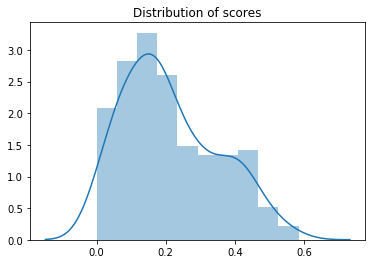

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(scores)
plt.title('Distribution of scores')

In [33]:
#TODO: also need to take into account the isomers, so need to calculate the formula
good_scores = []
bad_scores = []
minim = 1
for i, row in annotated_data_with_spectra.iterrows():
    standards = str(row['standards_match']).lower()
    hmdb = row['matchesHMDB']
    for h in hmdb:
        score = h[1]
        if h[0] != 0:
            name = metabolites[h[0]][2].lower()
            #get the scores for metabolites matching the standards annotation
            if name == standards:
                if score < minim:
                    minim = score
                good_scores.append(score)
            
            #get the scores for metabolites not matching with the standards annotation
            if standards != 'nan':
                
                if name != standards:
                    #print(standards,i, name, score)
                    if '-' in standards:
                        basestd = standards.split('-')[-1]
                        basename = name.split('-')[-1]
                    if not (basestd == basename or basestd in basename):
                        #print('\t', basestd, basename)
                        #print('\t',standards,i, name, score)
                        bad_scores.append(score)
                    
        
print('Lowest score value for which the HMDB annotation matches with the ToxID annotation:',minim)

Lowest score value for which the HMDB annotation matches with the ToxID annotation: 0.37684168304562404


Text(0.5, 1.0, 'Distribution of good scores')

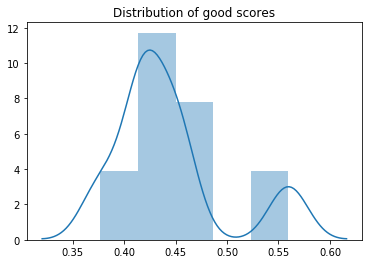

In [34]:
sns.distplot(good_scores)
plt.title('Distribution of good scores')

Text(0.5, 1.0, 'Distribution of bad scores')

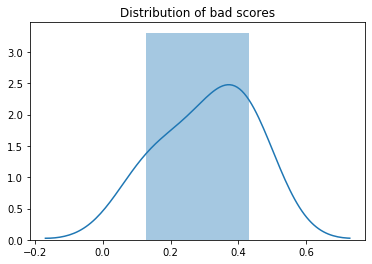

In [35]:
sns.distplot(bad_scores)
plt.title('Distribution of bad scores')

In [36]:
def plot_mirror(normalised_peaks_top, normalised_peaks_bottom):
    
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0})

    for mz,intensity in normalised_peaks_top:
        axs[0].plot([mz,mz], [0,intensity], 'k')
    
    for mz,intensity in normalised_peaks_bottom:
        axs[1].plot([mz,mz],[0,-intensity],'k')
   
    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
        ax.label_outer()
    plt.show()    
    


In [147]:
%matplotlib inline
for i, row in annotated_data_with_spectra.iterrows():
    print(row['custom_id'])
    print(row['standards_match'])
    print(row['matchesHMDB'])

    spectra = row['spectra']
    
    normalised_peaks_top_list = []
    normalised_peaks_bottom_list = []
    for spectrum in spectra:

        print(spectrum.file_name)
        normalised_peaks_top = spectra[spectrum].normalised_peaks
        normalised_peaks_top_list.append(normalised_peaks_top)
    for f in row['matchesHMDB']:
        
        if f[0] in metabolites:
            print(metabolites[f[0]])
        if f[2] != 0:
            normalised_peaks_bottom = f[2].normalised_peaks
            normalised_peaks_bottom_list.append(normalised_peaks_bottom)
        
    

        
    for top, bottom in zip(normalised_peaks_top_list, normalised_peaks_bottom_list):
        if bottom != 0:
            plot_mirror(top, bottom)

        
        
    print('----')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



1401
nan
[('HMDB0014988', 0.10091398134601763, <mnet.Spectrum object at 0x1207caa20>), ('HMDB0000210', 0.14256955298719487, <mnet.Spectrum object at 0x11edbbba8>)]
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-147-b15fc1a643dd>", line 13, in <module>
    print(spectrum.file_name)
AttributeError: 'str' object has no attribute 'file_name'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (m

AttributeError: 'str' object has no attribute 'file_name'

In [9]:
with open(os.path.join(osp,'pymz/mzmine/HMDBannotated_data.csv'), 'rb') as file:
    annodat = pickle.load(file)   

ModuleNotFoundError: No module named 'mnet'

In [38]:
annotated_data_with_spectra['HMDBspecAnno'] = ['nan']*len(annotated_data_with_spectra)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [39]:
for i, row in annotated_data_with_spectra.iterrows():
    hmdbspec = row['matchesHMDB']
    listanno = []
    for h in hmdbspec:
        score = h[1]
        
        if score >= 0.33:
            listanno.append((metabolites[h[0]], score))
            
    annotated_data_with_spectra.at[i,'HMDBspecAnno'] = listanno
            
    
    

In [143]:
with open(os.path.join(osp,'pymz/mzmine/HMDBannodat.csv'), 'wb') as handle:
    pickle.dump(annodat, handle)   

In [40]:
annotated_data_with_spectra

,row m/z,row retention time,adj-p,t-val,custom_id.1,compound_names,compound_id,pathway,standards_match,spectra,adducts,hmdbacc,hmdbname,matchesHMDB,HMDBspecAnno
custom_id,,,,,,,,,,,,,,,
2092,202.180209,11.976537,1.553678e-13,-11.450319,2092,NaN,row3,NaN,NaN,{'frag_pos': Spectrum from scan 3356 in /Users...,"[(201.1729326295028, M+H[1+], ), (402.34586525...","[HMDB0000731, HMDB0014868, HMDB0240212, HMDB00...","[Cysteine-S-sulfate, Thiabendazole, (alpha-ket...","[(HMDB0000068, 0.20266269674642604, Spectrum f...",[]
2233,216.195819,10.855802,2.904047e-13,-11.197623,2233,NaN,row4,NaN,NaN,{'frag_pos': Spectrum from scan 3584 in /Users...,"[(215.18854211640053, M+H[1+], ), (430.3770842...","[HMDB0013124, HMDB0015508, HMDB0060817, HMDB00...","[Propenoylcarnitine, Fencamfamine, Diethylcarb...","[(HMDB0003339, 0.31906728369856413, Spectrum f...",[]
3136,330.227323,9.587620,9.209904e-13,-10.660827,3136,NaN,row9,NaN,NaN,{'frag_pos': Spectrum from scan 5006 in /Users...,"[(329.22004642955164, M+H[1+], ), (658.4400928...","[HMDB0000058, HMDB0010329, HMDB0011616, HMDB00...","[Cyclic AMP, Dopamine glucuronide, Adenosine 2...","[(HMDB0014341, 0.19480570322668933, Spectrum f...",[]
3200,350.084413,9.239999,1.512342e-12,-10.325818,3200,NaN,row19,NaN,NaN,{'frag_pos': Spectrum from scan 5114 in /Users...,"[(349.077136481175, M+H[1+], ), (698.154272962...","[HMDB0000175, HMDB0006733, HMDB0001035, HMDB00...","[Inosinic acid, CE(22:6(4Z,7Z,10Z,13Z,16Z,19Z)...","[(HMDB0015679, 0.10701993327111735, Spectrum f...",[]
6831,170.117551,6.169358,6.515865e-12,9.897485,6831,NaN,row22,NaN,NaN,{'frag_pos': Spectrum from scan 2620 in /Users...,"[(169.11027460322325, M+H[1+], ), (338.2205492...","[HMDB0000001, HMDB0000216, HMDB0000239, HMDB00...","[1-Methylhistidine, Norepinephrine, Pyridoxine...","[(HMDB0003640, 0.2563842841682379, Spectrum fr...",[]
7167,345.129079,9.243420,3.518229e-10,-8.741341,7167,NaN,row34,NaN,NaN,{'frag_pos': Spectrum from scan 5093 in /Users...,"[(344.1218027161726, M+H[1+], ), (688.24360543...","[HMDB0061041, HMDB0015034, HMDB0000163, HMDB00...","[dehydronifedipine, Triazolam, D-Maltose, Alph...","[(HMDB0001401, 0.19014377915602013, Spectrum f...",[]
715,115.075365,5.901156,8.649271e-10,-8.480876,715,['6-Hydroxyhexanoic acid; 6-Hydroxyhexanoate'],['E13'],NaN,NaN,{'frag_pos': Spectrum from scan 1142 in /Users...,"[(114.06808840902345, M+H[1+], ), (228.1361768...","[HMDB0000076, HMDB0000257, HMDB0003646, HMDB00...","[Dihydrouracil, Thiosulfate, N-Methylhydantoin...","[(HMDB0001901, 0.3102027763277032, Spectrum fr...",[]
2810,272.185402,9.779160,3.332528e-08,-7.385317,2810,NaN,row71,NaN,NaN,{'frag_pos': Spectrum from scan 4489 in /Users...,"[(271.1781254497339, M+H[1+], ), (542.35625089...","[HMDB0014004, HMDB0041959, HMDB0060647, HMDB00...","[Norhydromorphone, Normorphine, 4-hydroxy keto...","[(HMDB0002096, 0.09893869734154602, Spectrum f...",[]
909,127.111731,5.993860,4.289209e-08,-7.301593,909,"[nan, 'Octanoic acid; Caprylic acid; Octylic a...","['E26', 'E28', 'E123']","['Linoleate metabolism', 'Fatty acid activation']",NaN,{'frag_pos': Spectrum from scan 1450 in /Users...,"[(126.10445429952641, M+H[1+], ), (252.2089085...","[HMDB0000262, HMDB0002024, HMDB0003192, HMDB00...","[Thymine, Imidazoleacetic acid, 5-Aminoimidazo...","[(HMDB0002024, 0.22378125239931773, Spectrum f...",[]


In [41]:
with open(os.path.join('/Users/anamaria/Desktop/mzmine/HAT_HMDBannotated_data.csv'), 'wb') as handle:
    pickle.dump(annotated_data_with_spectra, handle)   

In [11]:
with open(os.path.join(osp,'pymz/mzmine/HMDBannotated_data.csv'), 'rb') as file:
    ann = pickle.load(file)